In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from __future__ import absolute_import, division, print_function

import pathlib

In [3]:
dataset_path = "C:/Users/HP/OneDrive/Desktop/Fuel Efficiency.csv"
dataset_path

'C:/Users/HP/OneDrive/Desktop/Fuel Efficiency.csv'

In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
394,"27,4,140,86,2790,15.6,82,1,ford",mustang,gl,NaN,NaN,NaN,NaN,NaN
395,"44,4,97,52,2130,24.6,82,2,vw",pickup,NaN,NaN,NaN,NaN,NaN,NaN
396,"32,4,135,84,2295,11.6,82,1,dodge",rampage,NaN,NaN,NaN,NaN,NaN,NaN
397,"28,4,120,79,2625,18.6,82,1,ford",ranger,NaN,NaN,NaN,NaN,NaN,NaN
398,"31,4,119,82,2720,19.4,82,1,chevy",s-10,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
origin = dataset.pop('Origin')

In [6]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
394,"27,4,140,86,2790,15.6,82,1,ford",mustang,gl,NaN,NaN,NaN,NaN,0.0,0.0,0.0
395,"44,4,97,52,2130,24.6,82,2,vw",pickup,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
396,"32,4,135,84,2295,11.6,82,1,dodge",rampage,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
397,"28,4,120,79,2625,18.6,82,1,ford",ranger,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
398,"31,4,119,82,2720,19.4,82,1,chevy",s-10,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [7]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

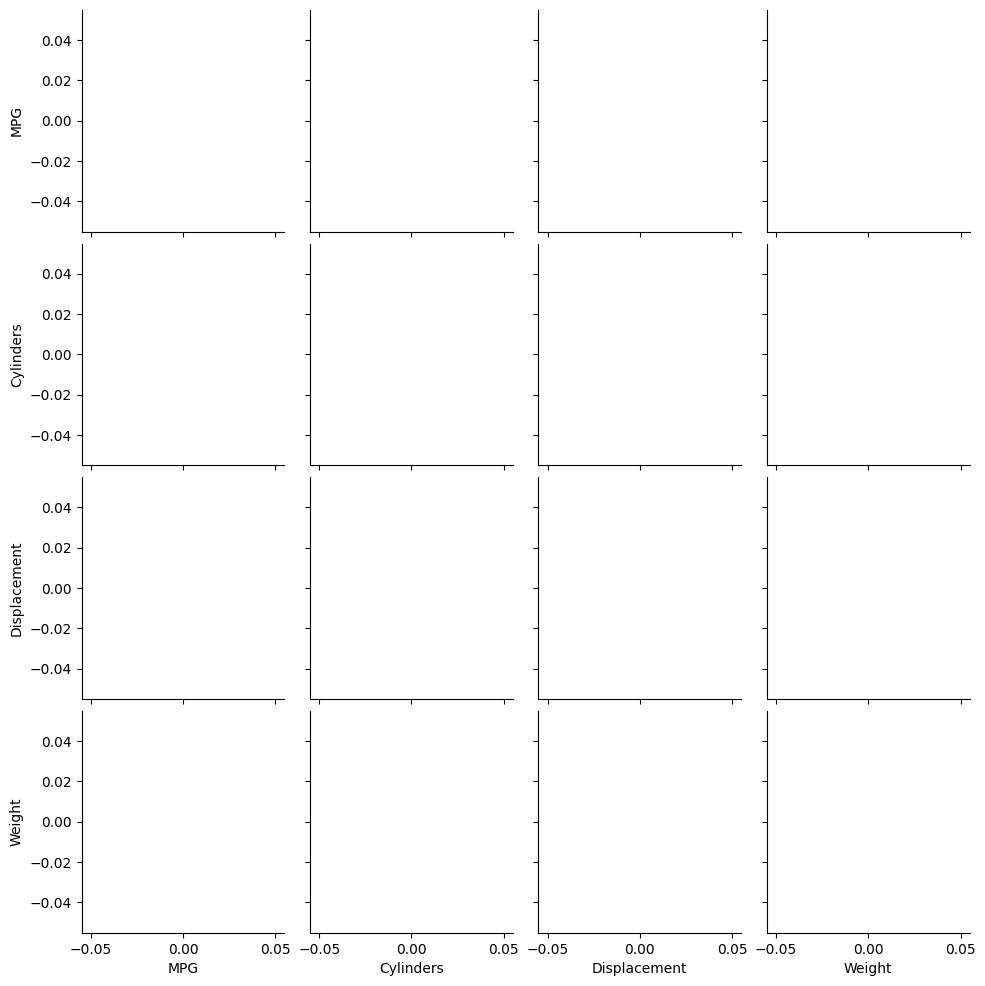

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_dataset is already loaded
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

# To display the plot
plt.show()


In [9]:
print(train_dataset.columns)


Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')


In [10]:
print(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]].info())


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 132 to 143
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MPG           319 non-null    object
 1   Cylinders     318 non-null    object
 2   Displacement  167 non-null    object
 3   Weight        3 non-null      object
dtypes: object(4)
memory usage: 12.5+ KB
None


In [11]:
train_dataset = train_dataset.dropna(subset=["MPG", "Cylinders", "Displacement", "Weight"])


In [12]:
print(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]].dtypes)


MPG             object
Cylinders       object
Displacement    object
Weight          object
dtype: object


In [13]:
train_dataset["MPG"] = pd.to_numeric(train_dataset["MPG"], errors='coerce')
train_dataset["Cylinders"] = pd.to_numeric(train_dataset["Cylinders"], errors='coerce')
train_dataset["Displacement"] = pd.to_numeric(train_dataset["Displacement"], errors='coerce')
train_dataset["Weight"] = pd.to_numeric(train_dataset["Weight"], errors='coerce')
